# Adversarial patches suitable for military domains
- 작성자 : 우병주
- 마지막 수정일 : 2021.12.03

#### 1. 사전 준비
 - GPU 사양을 확인한다
 - torchvision, tensorboard, IQA_pytorch를 설치한다
 - 구글드라이브에 mount한다

In [ ]:
!nvidia-smi

In [ ]:
!pip3 install torch torchvision

In [ ]:
!pip install tensorboardX tensorboard

In [ ]:
pip install IQA_pytorch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#### 2. 패치 학습하기
 - 패치를 학습한다

In [ ]:
%cd /content/drive/MyDrive/adversarial-yolo
!python train_patch.py

#### 3. 패치 테스트 하기
 - 각각 테스트를 적용하여 detection하고, 성능을 평가한다.
 - patch_name 자리에는 테스트할 patch의 이름을 넣는다
 - magfile_name 자리에는 저장할 matfile의 이름을 넣는다

In [ ]:
%cd /content/drive/MyDrive/adversarial-yolo
!python test_military.py PATCH_A

In [ ]:
%cd /content/drive/MyDrive/adversarial-yolo
!python eval_military.py PATCH_A

#### 4. matfile 확인하기
 - eval한 결과를 시각적으로 확인할 수 있다
 - training log를 시각적으로 확인할 수 있다

In [ ]:
import matplotlib.pyplot as plt
from scipy import io
import numpy as np

'''
getAP returns AP value as percentage with given recall, prevision values
'''
def getAP(x_values, y_values):
    length = len(x_values)
    prev_max = y_values[0]
    x1 = x_values.copy()
    y1 = []
    for i in range(length):
        prev_max = max(prev_max, y_values[i])
        y1.append(prev_max)
    x2 = np.concatenate(([x_values[0]],x1),0)
    y2 = np.concatenate(([0],y1),0)
    x3 = np.concatenate((x2, [0]),0)
    y3 = np.concatenate((y2,[y_values[-1]]),0)
    length +=2
    sum = 0
    for i in range(length-1):
        delta_x = x3[i+1] - x3[i]
        sum += 0.5*abs(delta_x)*(y3[i]+y3[i+1])
    return sum*100

mat_file1 = io.loadmat("/content/drive/MyDrive/adversarial-yolo/result/MILITARY_AP.mat")
mat_file2 = io.loadmat("/content/drive/MyDrive/adversarial-yolo/result/PATCH_A_AP.mat")
mat_file3 = io.loadmat("/content/drive/MyDrive/adversarial-yolo/result/PATCH_B_AP.mat")
mat_file4 = io.loadmat("/content/drive/MyDrive/adversarial-yolo/result/PREV_AP.mat")

x_values1 = mat_file1.get('recall')[0]
y_values1 = mat_file1.get('precision')[0]
x_values2 = mat_file2.get('recall')[0]
y_values2 = mat_file2.get('precision')[0]
x_values3 = mat_file3.get('recall')[0]
y_values3 = mat_file3.get('precision')[0]
x_values4 = mat_file4.get('recall')[0]
y_values4 = mat_file4.get('precision')[0]

lab1 = 'MILITARY : AP: %.2f%%'%getAP(x_values4,y_values4)
lab2 = 'PATCH A : AP: %.2f%%'%getAP(x_values2,y_values2)
lab3 = 'PATCH B : AP: %.2f%%'%getAP(x_values3,y_values3)
lab4 = 'PREV     :   AP: %.2f%%'%getAP(x_values1,y_values1)

plt.plot(x_values1, y_values1, color = 'red', label = lab1)	       
plt.scatter(x_values1,y_values1, color = 'red', s = 5)                   
plt.plot(x_values2, y_values2, color = 'orange', label = lab2)
plt.scatter(x_values2,y_values2, color = 'orange', s = 5)                   
plt.plot(x_values3, y_values3, color = 'blue', label = lab3)     	
plt.scatter(x_values3,y_values3, color = 'blue', s = 5)                  
plt.plot(x_values4, y_values4, color = 'green', label = lab4)     
plt.scatter(x_values4,y_values4, color = 'green', s = 5)       

xs = [0,1.04]
ys = [0,1.04]
plt.plot(xs, ys, color = 'gray', linestyle = '--')  
plt.axis([0, 1.05, 0, 1.05])      
plt.xlabel('Recall')                
plt.ylabel('Precision')           
plt.legend(bbox_to_anchor=(0.95, -0.15), ncol=2, fancybox=True, shadow=True)
plt.show()                        

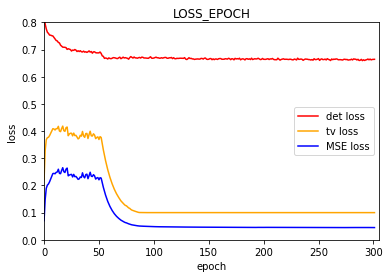

In [ ]:
import matplotlib.pyplot as plt
from scipy import io

mat_file1 = io.loadmat("/content/drive/MyDrive/adversarial-yolo/result/112001_log.mat")

det_loss = mat_file1.get('det_loss')[0]
ct_loss = mat_file1.get('ct_loss')[0]
tv_loss = mat_file1.get('tv_loss')[0]

num_epoch = len(det_loss)
epochs = [i for i in range(num_epoch)]

plt.xlabel('epoch')
plt.ylabel('loss')         
plt.plot(epochs, det_loss , color = 'red', label = 'det loss')	      
plt.plot(epochs, tv_loss , color = 'orange', label = 'tv loss')	   
plt.plot(epochs, ct_loss , color = 'blue', label = 'MSE loss')	      
plt.title('LOSS_EPOCH')
plt.axis([0, num_epoch + 3, 0.00, 0.8])   
plt.legend()
plt.show()                 